In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [8]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=42)

In [9]:
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]], shape=(1000, 2))

In [10]:
y

array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0,
       0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2,

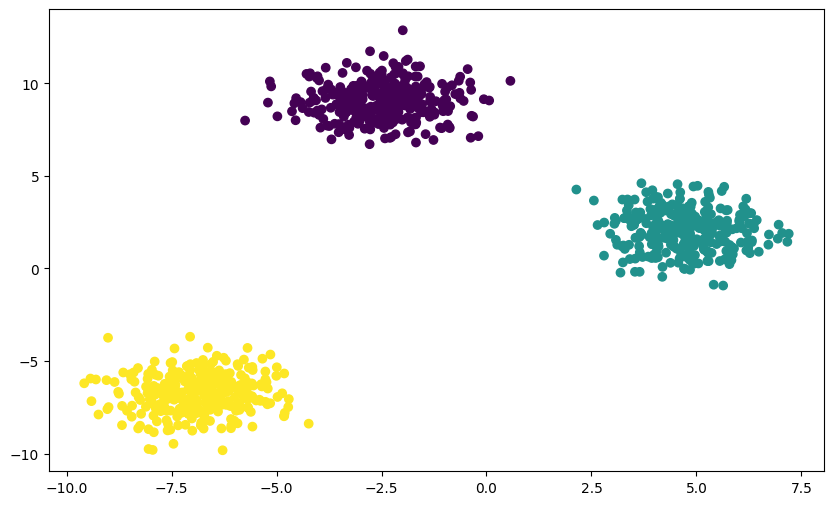

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[1600.0000000000002,
 508.7488689892825,
 51.75322236627199,
 45.51694637531676,
 38.66802479175928,
 35.4230281638924,
 28.086913893556275,
 25.947746846981932,
 23.483111294114245,
 23.22145992889554]

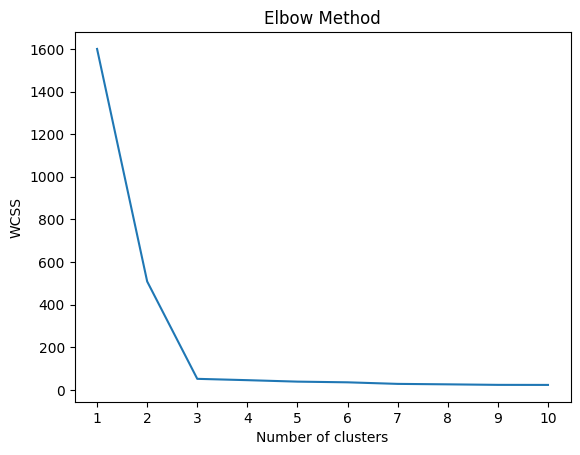

In [16]:
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(X_train_scaled)
kmeans.fit_predict(X_train_scaled)

array([2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1,
       1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 1,
       2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2,
       2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 0,
       2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0,
       0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 1,
       0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2,
       2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2,

In [18]:
y_pred=kmeans.predict(X_test_scaled)

In [19]:
y_pred

array([0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0,
       0, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 1, 2,
       0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2,
       1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2,
       0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 2,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 0], dtype=int32)

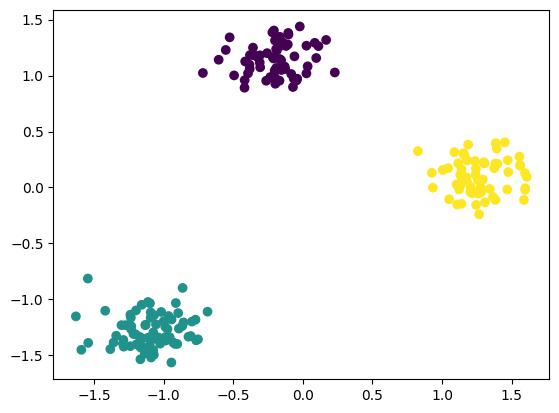

In [20]:
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='viridis')

In [22]:
# validating the k value
# kneelocater 
# silhoutee Scoring

In [24]:
!pip install kneed

In [25]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')


In [26]:
kneedle.elbow

np.int64(3)

In [27]:
from sklearn.metrics import silhouette_score
siloheutte_coeff=[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled, kmeans.labels_)
    siloheutte_coeff.append(score)


In [29]:
siloheutte_coeff


[0.6851973424700912,
 0.8424768202445475,
 0.6754734424031247,
 0.5121291360024537,
 0.5024509454121877,
 0.3432407291522929,
 0.3365497572195229,
 0.34009641518801265,
 0.3401191345243458]

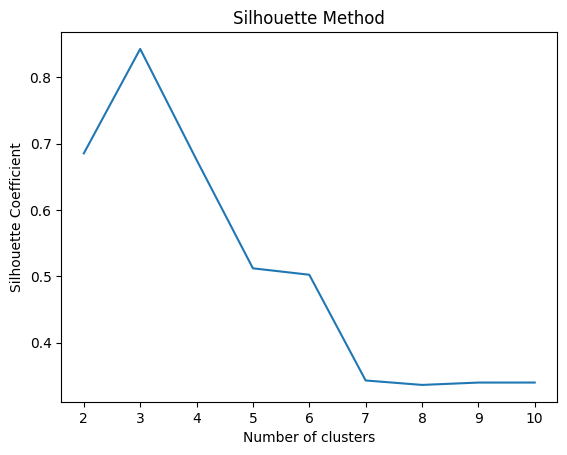

In [30]:
plt.plot(range(2, 11), siloheutte_coeff)
plt.xticks(range(2, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Method')
plt.show()